importing the packages

In [1]:
import numpy as np
import pandas as pd
from sklearn_extra.cluster import KMedoids
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from itertools import islice
from sklearn.metrics.pairwise import euclidean_distances
import random
import warnings
import math
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=DeprecationWarning)
from training import models_train_batch,models_train_Approach1
from testing import models_test,models_test_single

pre-processing datasets

In [2]:
def breast_cancer(df):
    
    df=df.drop('Unnamed: 32',axis=1)
    labels=df['diagnosis']
    data=df.drop('id',axis=1)
    data = data.drop('diagnosis', axis=1)
    labels = labels.map({'B': 0, 'M': 1})
    data['labels']=labels
    return data   

In [3]:
def heart_disease(df):
    random.seed(2411)
    df.cp = pd.Categorical(df.cp)
    df.restecg = pd.Categorical(df.restecg)
    df.slope = pd.Categorical(df.slope)
    df.ca = pd.Categorical(df.ca)
    df.thal = pd.Categorical(df.thal)

    df = pd.get_dummies(df, drop_first=True)

    df = df[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
             'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
             'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2',
             'thal_3','target']]
    return df

In [4]:
def liver_disease(df):
    data2 = df.copy(deep=True)
    numerical_features = data2.drop(['Dataset', 'Gender'], axis=1)
    label = data2.Dataset.map({1:0, 2:1})
    numerical_features.Albumin_and_Globulin_Ratio.fillna(0, inplace=True)
    scaler = StandardScaler()
    scaled = scaler.fit_transform(numerical_features)
    dataframe = pd.DataFrame(scaled, columns=numerical_features.columns)
    dataframe['Gender'] = data2.Gender
    data3 = pd.get_dummies(dataframe)
    data3['labels']=label
    
    return data3

Clustering

In [5]:
def clustering(df,dataset,num_of_clusters):
    random.seed(2411)
    print(df.index)
    persons=[]
    if dataset == "heart_disease":
        new_df = df.drop('target', axis=1)
    elif dataset == "breast_cancer":
        new_df = df.drop('labels', axis=1)
        
    elif dataset == "liver_disease":
        new_df = df.drop('labels', axis=1)
    
    elif dataset == "thyroid":
        new_df = df.drop('classes', axis=1)
    elif dataset == "diabetes":
        new_df = df.drop('Outcome', axis=1)
        
    
    km = KMedoids(n_clusters=num_of_clusters)
    km = km.fit(new_df)
    cluster_centers = km.cluster_centers_
    transform_centers=km.transform(cluster_centers)


    
    for j in range(num_of_clusters):
        l = [df.iloc[i] for i in range(len(new_df)) if km.labels_[i]==j]
        ldf = pd.DataFrame(l)
        
        persons.append(ldf)
    
  
    
    test_centers, train_centers = np.split(cluster_centers, [int(0.3 * len(cluster_centers))])
    tmp = [persons.pop() for _ in range(int(0.8*len(persons)))]
    test,train = persons, [tmp.pop() for _ in range(len(tmp))]
    return test_centers, train_centers,train,test

finding most similar person_euclidean distance

In [6]:
def finding_distance(test_centers,train_centers):
    
    min_distances = []
    best_persons=[]
    for m in test_centers:
        
        distances_list=[]
        distances_list1=[]
       
        
       
        m1=np.array(m)
        m1=m1.reshape(1,-1)
        

        print("Train:")
        for n in train_centers:
           
            n1=np.array(n)
            n1=n1.reshape(1,-1)
            
            
            
            distance =  euclidean_distances(m1, n1)
            distances_list.append(distance)
            min_distance= min(distances_list)
                       
        print("euclidean_distances:",distances_list)
        print("Min of the Euclidean_distance:",min_distance)

        min_distances.append(min_distance)
        index_position=distances_list.index(min_distance)
        best_persons.append(index_position)
    return min_distances,best_persons

Train_Test Split

In [7]:
def train_test_split_dataset(dataset,new_df2,new_df3):

    if dataset == "breast_cancer":
        X = new_df2.iloc[:,0:30]
        Y = new_df2.iloc[:,30]
        X_test=new_df3.iloc[:,0:30]
        Y_test=new_df3.iloc[:,30]
        
        Y=Y.astype('int')
        
        Y_test=Y_test.astype('int')
        
    elif dataset == "heart_disease":
        X = new_df2.iloc[:,0:22]
        Y = new_df2.iloc[:,22]
        X_test=new_df3.iloc[:,0:22]
        Y_test=new_df3.iloc[:,22]
        
        Y=Y.astype('int')
        
        Y_test=Y_test.astype('int')
        
    elif dataset == "liver_disease":
        X = new_df2.iloc[:,0:11]
        Y = new_df2.iloc[:,11]
        X_test=new_df3.iloc[:,0:11]
        Y_test=new_df3.iloc[:,11]
       
        Y=Y.astype('int')
        
        Y_test=Y_test.astype('int')
    elif dataset == "thyroid":
        X = new_df2.iloc[:,0:23]
        Y = new_df2.iloc[:,23]
        X_test=new_df3.iloc[:,0:23]
        Y_test=new_df3.iloc[:,23]
       
        Y=Y.astype('int')
        
        Y_test=Y_test.astype('int')
    elif dataset == "diabetes":
        X = new_df2.iloc[:,0:8]
        Y = new_df2.iloc[:,8]
        X_test=new_df3.iloc[:,0:8]
        Y_test=new_df3.iloc[:,8]
       
        Y=Y.astype('int')
        
        Y_test=Y_test.astype('int')
    return X_test,Y_test,X,Y

In [8]:
def train_test_split_dataset_personalized(dataset,new_df2):
    
    random.seed(2411)
    if dataset == "breast_cancer":
        X = new_df2.iloc[:,0:30]
        Y = new_df2.iloc[:,30]
        Y=Y.astype('int')
        
    elif dataset == "heart_disease":
        X = new_df2.iloc[:,0:22]
        Y = new_df2.iloc[:,22]
        Y=Y.astype('int')
        
    elif dataset == "liver_disease":
        X = new_df2.iloc[:,0:11]
        Y = new_df2.iloc[:,11]
        Y=Y.astype('int')
    elif dataset == "thyroid":
        X = new_df2.iloc[:,0:23]
        Y = new_df2.iloc[:,23]
        Y=Y.astype('int')
    elif dataset == "diabetes":
        X = new_df2.iloc[:,0:8]
        Y = new_df2.iloc[:,8]
        Y=Y.astype('int')
        
    return X,Y   


Batch Approach

In [9]:
def batch_method(dataset,train,test):
    new_df2=pd.DataFrame()
    mae_list=[]
    acc_list=[]
    method="Batch model"
    test_persons=[]
    for a in train:
         
        for i in range(len(a)):
            new_df2 = new_df2.append(df.loc[[(a.index[i])]])
    for b in test:
        new_df3=pd.DataFrame() 
        for j in range(len(b)):
            new_df3 = new_df3.append(df.loc[[(b.index[j])]])
        test_persons.append(new_df3)
    n=0        
    for new_df3 in test_persons:

        X_test,Y_test,X,Y = train_test_split_dataset(dataset,new_df2,new_df3)    

        X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=42)
        X_test, y_test = X_test,Y_test

        models=models_train_batch(X_train, X_val, y_train, y_val)

        auc,mae=models_test_single(X_test,y_test,models,dataset,n,method)
        n=n+1
        acc_list.append(auc)
        mae_list.append(mae)
    
    return acc_list,mae_list

Personalized Approach

In [10]:
def personalized_1(dataset,train,test,best_person):
    new_df2=pd.DataFrame()
    test_persons=[]
    mae_list=[]
    acc_list=[]
    method="Personalized_Approach_1 model"
    n=0
    for b in test:
        new_df3=pd.DataFrame() 
        for j in range(len(b)):
            new_df3 = new_df3.append(df.loc[[(b.index[j])]])
        test_persons.append(new_df3)
        a=train[best_person[n]]
        n=n+1
        for i in range(len(a)):
            new_df2 = new_df2.append(df.loc[[(a.index[i])]])
        
    m=0   
    for new_df3 in test_persons:
    
        X_test,Y_test,X,Y = train_test_split_dataset(dataset,new_df2,new_df3) 
        models=models_train_Approach1(dataset,X,Y)
        
        auc,mae=models_test_single(X_test,Y_test,models,dataset,m,method)
        m=m+1
        acc_list.append(auc)
        mae_list.append(mae)
    
    return acc_list,mae_list

In [11]:
def personalized_1_train_all(dataset,train):
    
    random.seed(2411)
    
    train_persons_list=[]

    models_list=[]
    for i in range(len(train)):
        new_df2=pd.DataFrame()
        a=train[i] 
        for j in range(len(a)):
            new_df2= new_df2.append(df.loc[[(a.index[j])]])
          
        train_persons_list.append(new_df2)
    
    for n in range(len(train_persons_list)):
        

        
        train_person=train_persons_list[n]
        

        X,Y = train_test_split_dataset_personalized(dataset,train_person)    
        models=models_train_Approach1(dataset,X,Y)
        
        models_list.append(models)
    return  models_list

In [12]:
def personalized_1_test(dataset,test,models):
    random.seed(2411)  
    test_persons=[]
    auc_list=[]
    mae_list=[]
    method="Personalized_Approach_2 model"
    for k in range(len(test)):
        new_df3=pd.DataFrame()        
        b=test[k]
        for l in range(len(b)):
            new_df3 = new_df3.append(df.loc[[(b.index[l])]])
        test_persons.append(new_df3)
        
    for n in range(len(test_persons)):
        test_person=test_persons[n]
        

        X_test,y_test = train_test_split_dataset_personalized(dataset,test_person)
        
        auc,mae=models_test(X_test,y_test,models,dataset,n,method)
        auc_list.append(auc)
        mae_list.append(mae)
    return auc_list,mae_list

Main Function

enter the dataset:heart_disease
enter the number of persons:5
RangeIndex(start=0, stop=303, step=1)
Train:
euclidean_distances: [array([[49.60806386]]), array([[66.08509666]]), array([[39.45072876]]), array([[64.5368112]])]
Min of the Euclidean_distance: [[39.45072876]]
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.52, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.52, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.52, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.001, kernel=rbf, score=0.7083333333333334, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ...... C=100, gamma=0.0001, kernel=rbf, score=0.48, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ...... C=100, gamma=0.0001, kernel=rbf, score=0.76, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.7916666666666666, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] .......... C=1000, gamma=1, kernel=rbf, score=0.52, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] .......... C=1000, gamma=1, kernel=rbf, score=0.52, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ........... C=1000, gamma=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...........................

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished


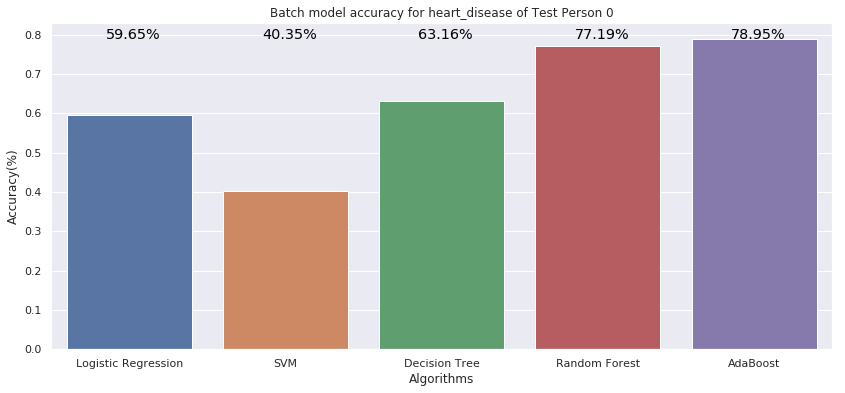

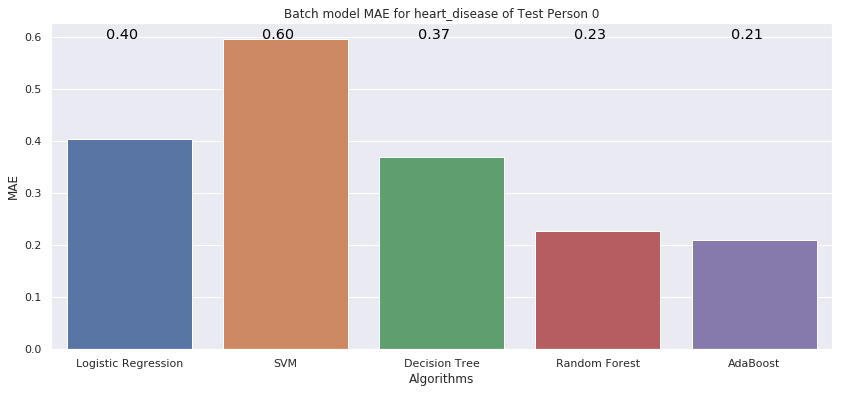

/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........... C=1, gamma=0.01, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ......... C=1, gamma=0.001, kernel=rbf, score=0.75, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.3333333333333333, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .......... C=1, gamma=0.001, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ........ C=1, gamma=0.0001, kernel=rbf, score=0.75, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ......... C=1, gamma=0.0001, kernel=rbf, score=1.0, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf ...................................

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished


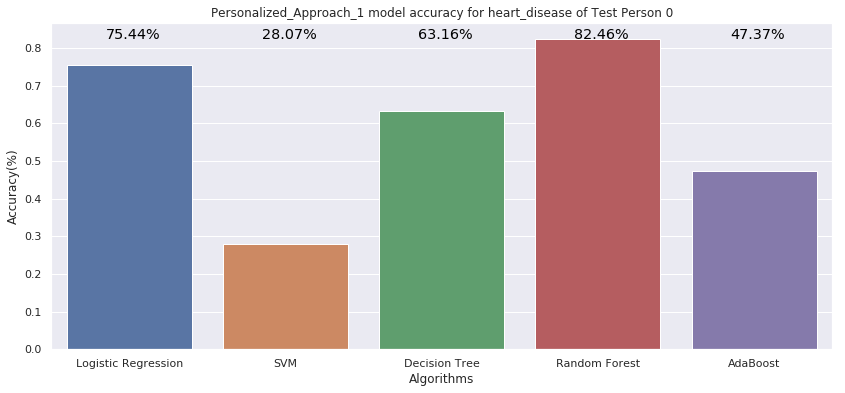

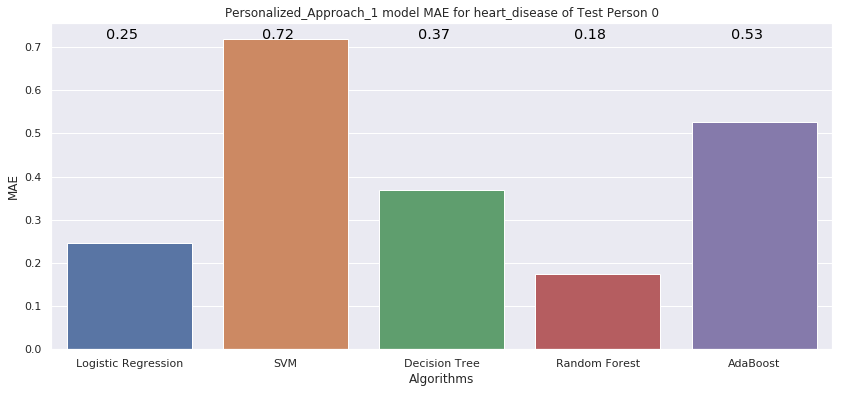

In [13]:


if __name__== "__main__":
    random.seed(2411)
    dataset=input("enter the dataset:")
    num_of_clusters = int(input("enter the number of persons:"))
    if dataset == "heart_disease":
        df = pd.read_csv("heart.csv")
        df=heart_disease(df)
    elif dataset == "breast_cancer":
        df = pd.read_csv("data.csv")
        df=breast_cancer(df)
    elif dataset == "liver_disease":
        df = pd.read_csv("indian_liver_patient.csv")
        df=liver_disease(df)
    elif dataset == "thyroid":  
        df = pd.read_csv("thyroid_dataset.csv")
    elif dataset == "diabetes":  
        
        df = pd.read_csv("diabetes.csv")
        
    
    test_centers, train_centers,train,test  = clustering(df,dataset,num_of_clusters)
    
    min_distances,best_person = finding_distance(test_centers,train_centers)
    
    
    
    acc_batch,mae_batch = batch_method(dataset,train,test)   
    acc_p1,mae_p1 = personalized_1(dataset,train,test,best_person)
    
    
    
    

Comparing all train Person models

/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBack

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=0.6, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=0.6, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=0.6, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=0.6, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ......... C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.3333333333333333, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished


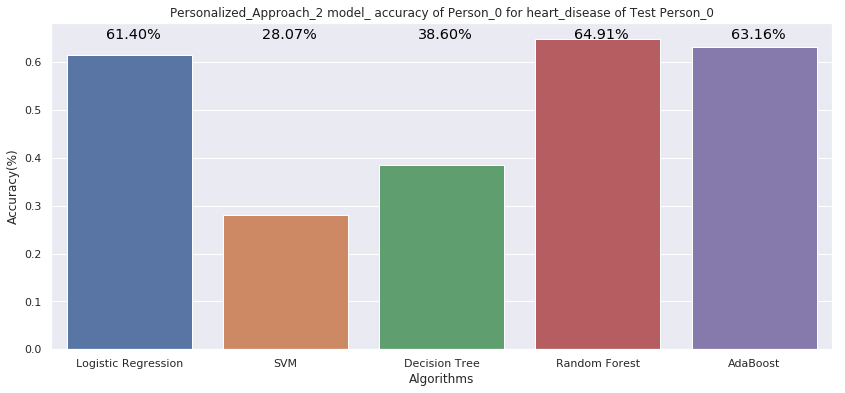

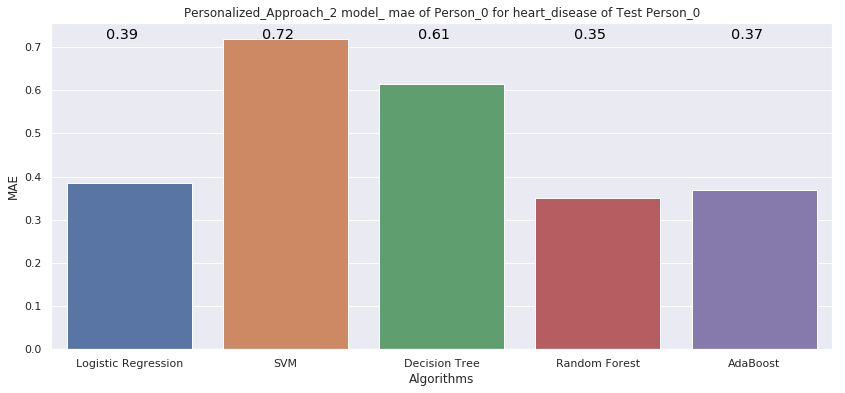

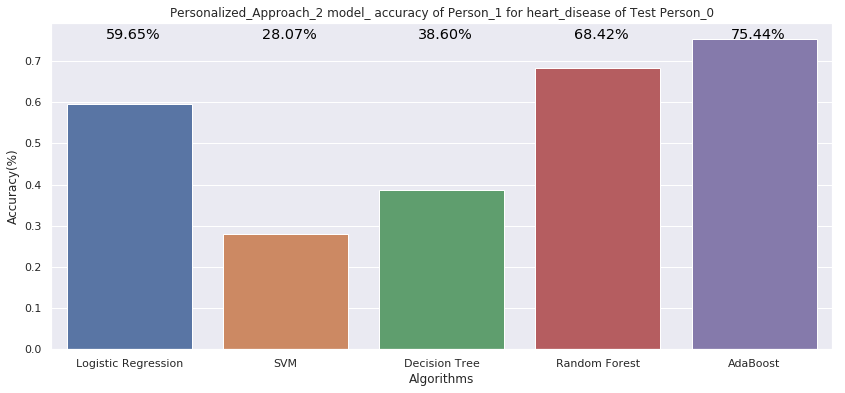

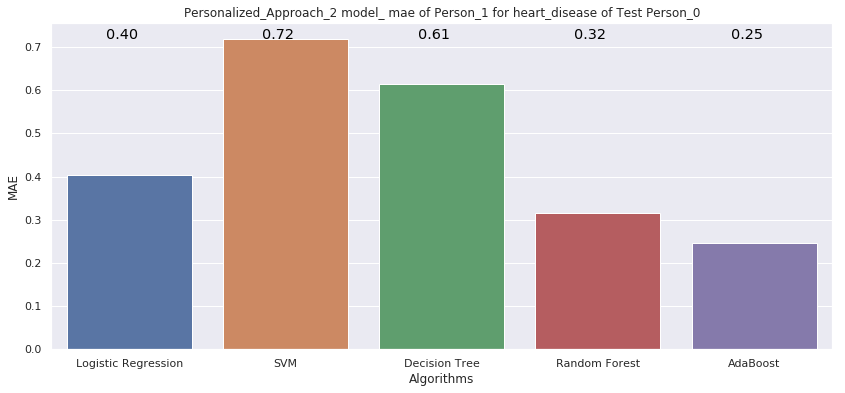

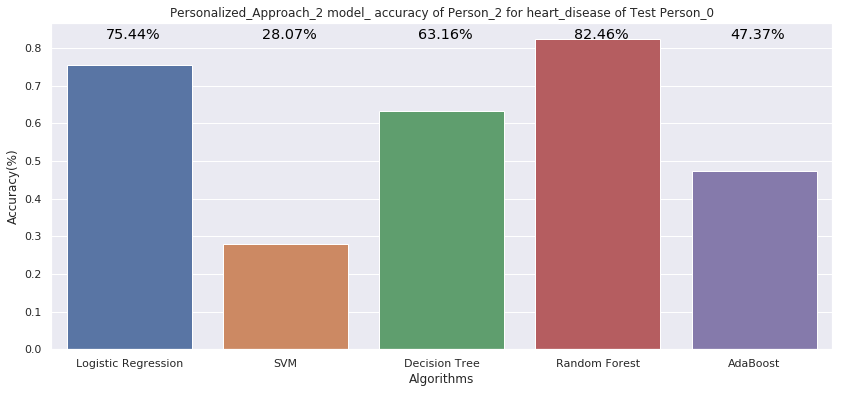

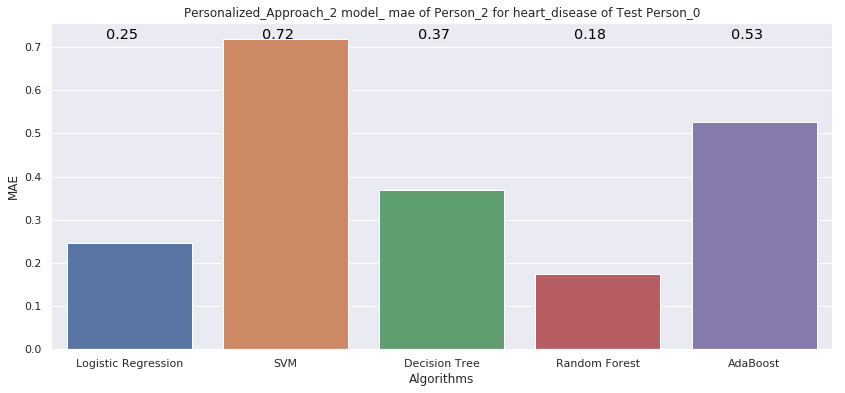

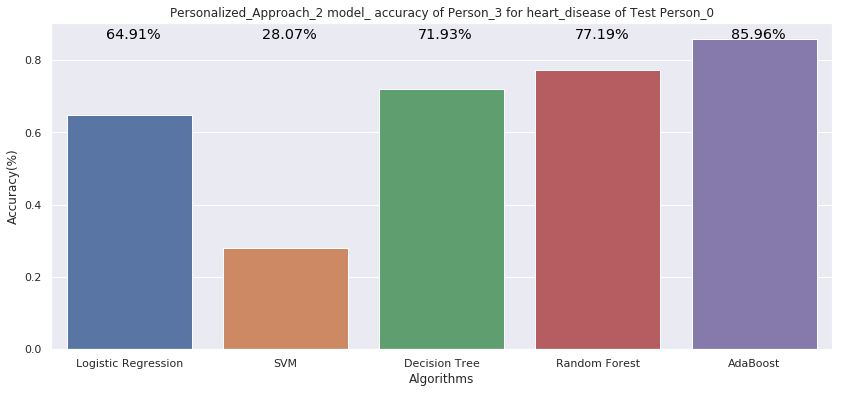

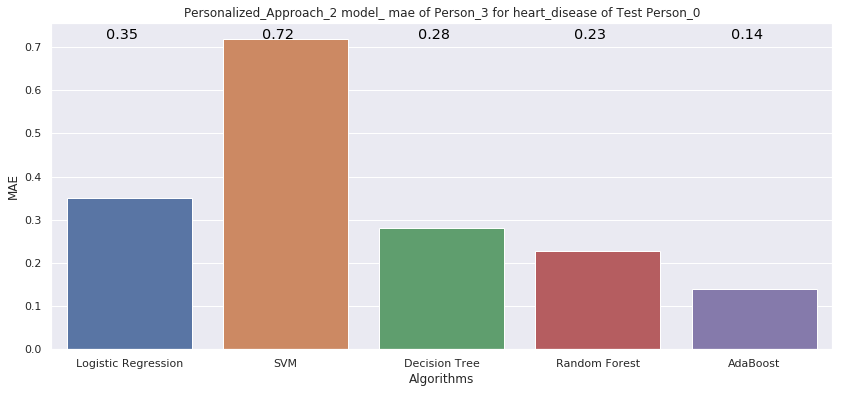

In [14]:
models=personalized_1_train_all(dataset,train)
acc_test_persons,mae_test_persons=personalized_1_test(dataset,test,models)

In [15]:
mae_test_persons

[[{'Logistic Regression': 0.38596491228070173,
   'SVM': 0.7192982456140351,
   'Decision Tree': 0.6140350877192983,
   'Random Forest': 0.3508771929824561,
   'AdaBoost': 0.3684210526315789},
  {'Logistic Regression': 0.40350877192982454,
   'SVM': 0.7192982456140351,
   'Decision Tree': 0.6140350877192983,
   'Random Forest': 0.3157894736842105,
   'AdaBoost': 0.24561403508771928},
  {'Logistic Regression': 0.24561403508771928,
   'SVM': 0.7192982456140351,
   'Decision Tree': 0.3684210526315789,
   'Random Forest': 0.17543859649122806,
   'AdaBoost': 0.5263157894736842},
  {'Logistic Regression': 0.3508771929824561,
   'SVM': 0.7192982456140351,
   'Decision Tree': 0.2807017543859649,
   'Random Forest': 0.22807017543859648,
   'AdaBoost': 0.14035087719298245}]]

In [16]:
acc_test_persons

[[{'Logistic Regression': 0.6140350877192983,
   'SVM': 0.2807017543859649,
   'Decision Tree': 0.38596491228070173,
   'Random Forest': 0.6491228070175439,
   'AdaBoost': 0.631578947368421},
  {'Logistic Regression': 0.5964912280701754,
   'SVM': 0.2807017543859649,
   'Decision Tree': 0.38596491228070173,
   'Random Forest': 0.6842105263157895,
   'AdaBoost': 0.7543859649122807},
  {'Logistic Regression': 0.7543859649122807,
   'SVM': 0.2807017543859649,
   'Decision Tree': 0.631578947368421,
   'Random Forest': 0.8245614035087719,
   'AdaBoost': 0.47368421052631576},
  {'Logistic Regression': 0.6491228070175439,
   'SVM': 0.2807017543859649,
   'Decision Tree': 0.7192982456140351,
   'Random Forest': 0.7719298245614035,
   'AdaBoost': 0.8596491228070176}]]

In [17]:
print(acc_batch) 
print(mae_batch)

[[{'Logistic Regression': 0.5964912280701754, 'SVM': 0.40350877192982454, 'Decision Tree': 0.631578947368421, 'Random Forest': 0.7719298245614035, 'AdaBoost': 0.7894736842105263}]]
[[{'Logistic Regression': 0.40350877192982454, 'SVM': 0.5964912280701754, 'Decision Tree': 0.3684210526315789, 'Random Forest': 0.22807017543859648, 'AdaBoost': 0.21052631578947367}]]


In [18]:
min_distances

[array([[39.45072876]])]

In [19]:
len(train)

4

In [20]:
len(test)

1